# ST2195 Coursework 

## Libraries

For this project to work in Python, the libraries below are required.

In [1]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let's check the working directory to ensure that we are in the correct directory. 

In [2]:
pwd

'E:\\ST2195\\Coursework'

## Database creation
First, we will set up a database to hold all the data contained in the csv files.

if os.path.exists("airline2.db"):
    os.remove("airline2.db")
    print("File deleted.")
else:
    print("The file does not exist.")

In [ ]:
if os.path.exists("airline2.db"):
    os.remove("airline2.db")
    print("File deleted.")
else:
    print("The file does not exist.")

In [4]:
airports=pd.read_csv("E:/ST2195/Coursework/datasets/airports.csv")
planes=pd.read_csv("E:/ST2195/Coursework/datasets/plane-data.csv")
carriers=pd.read_csv("E:/ST2195/Coursework/datasets/carriers.csv")
print("Reading complete.")

Reading complete.


In [5]:
#Create ontime table
def ontime():
    conn=sqlite3.connect("airline2.db")
    cur=conn.cursor()
    cur.execute('''CREATE TABLE IF NOT EXISTS ontime(
    Year INTEGER, 
    Month INTEGER, 
    DayOfMonth INTEGER, 
    DayOfWeek INTEGER, 
    DepTime INTEGER, 
    CRSDepTime INTEGER, 
    ArrTime INTEGER, 
    CRSArrTime INTEGER, 
    UniqueCarrier VARCHAR(5), 
    FlightNum INTEGER, 
    TailNum VARCHAR(10), 
    ActualElapsedTime INTEGER, 
    CRSElapsedTime INTEGER, 
    AirTime INTEGER, 
    ArrDelay REAL, 
    DepDelay REAL, 
    Origin VARCHAR(3), 
    Dest VARCHAR(3), 
    Distance INTEGER, 
    TaxiIn INTEGER, 
    TaxiOut INTEGER, 
    Cancelled INTEGER, 
    CancellationCode VARCHAR(1), 
    Diverted VARCHAR(1), 
    CarrierDelay INTEGER, 
    WeatherDelay INTEGER, 
    NASDelay INTEGER, 
    SecurityDelay INTEGER, 
    LateAircraftDelay INTEGER)''')
    
    #Import csv
    #Simply replace the range values if using more datasets. 
    for year in range(2004, 2006):
        csv_dir=('E:/ST2195/Coursework/datasets/ontime/'+str(year)+".csv")
        print('Processing', year)
        ontime=pd.read_csv(csv_dir, dtype={'Cancelled': int})
        ontime.to_sql('ontime', con=conn, if_exists='replace', index=False)
    
    print("Processing complete.")

    conn.commit()
    conn.close()

In [6]:
#Create other tables
def data():
    conn=sqlite3.connect("airline2.db")
    cur=conn.cursor()
    cur.execute('''CREATE TABLE IF NOT EXISTS airports(
    iata TEXT PRIMARY KEY, 
    airport TEXT, 
    city TEXT, 
    state TEXT, 
    country TEXT, 
    lat REAL, 
    long REAL)''')
    
    cur.execute('''CREATE TABLE IF NOT EXISTS planes(
    tailnum TEXT, 
    type TEXT, 
    manufacturer 
    TEXT, 
    issue_date DATE, 
    model TEXT, 
    status TEXT, 
    aircraft_type TEXT, 
    ngine_type TEXT, 
    year INTEGER)''')
    
    cur.execute('''CREATE TABLE IF NOT EXISTS carriers(
    code TEXT PRIMARY KEY, 
    description TEXT)''')

    airports.to_sql('airports', con=conn, if_exists='replace', index=False)
    planes.to_sql('planes', con=conn, if_exists='replace', index=False)
    carriers.to_sql('carriers', con=conn, if_exists='replace', index=False)
    
    conn.commit()
    conn.close()

In [7]:
def database():
    ontime()
    data()
    print("Database established.")

database()

Processing 2004
Processing 2005
Processing complete.
Database established.


Next I will run some of the same lines of code as above so that I may access the dataframes directly. 

In [8]:
csv_dir=('E:/ST2195/Coursework/datasets/ontime/')
df1=pd.read_csv(csv_dir+"2004.csv")
df2=pd.read_csv(csv_dir+"2005.csv")
ontime = pd.concat([df1,df2])
print("Ontime dataframe now accessible.")

Ontime dataframe now accessible.


## Sub-setting the ontime table

Not all variables are necessary for this project, so we will drop them. The following were dropped: <br>
ActualElapse <br>
CRSActualElapse <br>
TaxiIn <br>
TaxiOut <br>
CarrierDelay <br>
NASDelay <br>
WeatherDelay <br>
SecurityDelay <br>


Subset specific columns and combine the date variables (`Year`, `Month`, `Day`) into one column. 

In [9]:
cols=('Year','Month','DayofMonth','DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','UniqueCarrier','FlightNum','TailNum','ArrDelay','DepDelay','Origin','Dest','Distance','Cancelled','CancellationCode','Diverted','LateAircraftDelay')
ontime2 = ontime.loc[:, cols]
ontime2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,N805UA,-14.0,-7.0,ORD,CLT,599,0,NaN,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,N851UA,-4.0,-9.0,ORD,CLT,599,0,NaN,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,N436UA,5.0,3.0,ORD,CLT,599,0,NaN,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,N828UA,-16.0,-3.0,ORD,CLT,599,0,NaN,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,N831UA,3.0,5.0,ORD,CLT,599,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140591,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,N109DL,-22.0,-3.0,ATL,ONT,1900,0,NaN,0,0
7140592,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,N932DL,10.0,0.0,ATL,MEM,332,0,NaN,0,0
7140593,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,N306DL,-8.0,-4.0,ATL,SAT,874,0,NaN,0,0
7140594,2005,12,22,4,924.0,925,1056.0,1111,DL,904,N981DL,-15.0,-1.0,ATL,MSP,906,0,NaN,0,0


In [10]:
#ontime2.isnull().sum()
ontime2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269866 entries, 0 to 7140595
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  Cancelled          int64  
 17  CancellationCode   object 
 18  Diverted           int64  
 19  LateAircraftDelay  int64  
dtypes: float64(4), int64(11), object(5)
memory usage: 2.2+ GB


## Creating a sample

The ontime table is too large with 14 million observations. Using the table as-is will require a long processing time when running the code as well as a large memory, so for efficiency’s sake, we will draw a sample. This will done with the stratified sampling method because after exploring and analysing the data, I have found that the days act as subgroups, and I want a sample that best represents the population, i.e., the original table.

In [11]:
#Create a sample to work with for efficiency
o = ontime2.groupby(['DayOfWeek', 'Month'], group_keys=False).apply(lambda x: x.sample(frac=0.0144, random_state=7))
#Check the size of the sample
o.shape[0]

205486

In [12]:
#Check proportions of sample
o.DayOfWeek.value_counts()

5    30419
4    30355
1    30145
3    29947
2    29825
7    28540
6    26255
Name: DayOfWeek, dtype: int64

In [13]:
#What the proportion of the sample should look like
ontime2.DayOfWeek.value_counts()/ontime.shape[0]*200000

5    29606.893295
4    29544.692291
1    29341.214557
3    29148.542810
2    29028.331450
7    27776.490683
6    25553.834913
Name: DayOfWeek, dtype: float64

In [14]:
o.Month.value_counts()

8     18059
7     17887
3     17553
5     17413
10    17319
6     17251
12    16979
1     16975
4     16955
9     16696
11    16571
2     15828
Name: Month, dtype: int64

In [15]:
ontime2.Month.value_counts()/ontime.shape[0]*200000

8     17575.652077
7     17409.091298
3     17084.280960
5     16948.428247
10    16857.187026
6     16790.444984
12    16525.368914
1     16523.084379
4     16502.775849
9     16249.318669
11    16128.364485
2     15406.003112
Name: Month, dtype: float64

The proportions for both sample and population are similar, so the sample is acceptable. <br>
Next, we will add three variables: `FlightDate`, `Day` and `NameOfMonth`. Having `FlightDate` is necessary for creation of the ` Day` and `NameOfMonth` variables. This is because we need a *datetime* data type, which can only be created with a complete date in the correct format, e.g. 2001/10/1. We cannot use the `Month` and `DayOfWeek` variables because the values are simply  numbers and they do not translate to an actual month or day, so Pandas will not be able to convert them. As such, we will combine the values from the `Year`, `Month`, and `DayOfMonth` variables and convert it through the `pd.to_datetime()` function. 


In [16]:
date=o['Year'].astype(str)+"/"+o['Month'].astype(str)+"/"+o['DayofMonth'].astype(str)
o['FlightDate'] = pd.to_datetime(date)
o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205486 entries, 551708 to 6712132
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               205486 non-null  int64         
 1   Month              205486 non-null  int64         
 2   DayofMonth         205486 non-null  int64         
 3   DayOfWeek          205486 non-null  int64         
 4   DepTime            201650 non-null  float64       
 5   CRSDepTime         205486 non-null  int64         
 6   ArrTime            201270 non-null  float64       
 7   CRSArrTime         205486 non-null  int64         
 8   UniqueCarrier      205486 non-null  object        
 9   FlightNum          205486 non-null  int64         
 10  TailNum            205483 non-null  object        
 11  ArrDelay           201270 non-null  float64       
 12  DepDelay           201650 non-null  float64       
 13  Origin             205486 non-null  ob

We will now extract the name of the day and month from `FlightDate` to create `Day` and `NameOfMonth`.

In [17]:
o['Day'] = o['FlightDate'].dt.day_name()
o['NameOfMonth'] = o['FlightDate'].dt.month_name()
o

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,LateAircraftDelay,FlightDate,Day,NameOfMonth
551708,2004,1,12,1,1338.0,1340,1415.0,1422,DH,6152,...,CVG,DAY,64,0,NaN,0,0,2004-01-12,Monday,January
564486,2005,1,31,1,NaN,625,NaN,743,DH,1752,...,HPN,IAD,247,1,A,0,0,2005-01-31,Monday,January
118317,2004,1,19,1,2050.0,2050,2141.0,2145,WN,1066,...,ONT,LAS,197,0,NaN,0,0,2004-01-19,Monday,January
520513,2004,1,26,1,1706.0,1710,1919.0,1913,CO,67,...,CLE,LAX,2053,0,NaN,0,0,2004-01-26,Monday,January
4747,2004,1,26,1,1240.0,1245,1442.0,1435,UA,579,...,IAD,DEN,1452,0,NaN,0,0,2004-01-26,Monday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697303,2004,12,19,7,1754.0,1620,1912.0,1805,OH,4961,...,CVG,AUS,958,0,NaN,0,0,2004-12-19,Sunday,December
6824860,2004,12,12,7,1034.0,1030,1530.0,1541,UA,484,...,DEN,DCA,1476,0,NaN,0,0,2004-12-12,Sunday,December
7068375,2004,12,26,7,1440.0,1445,1939.0,1939,CO,696,...,LAS,IAH,1222,0,NaN,0,0,2004-12-26,Sunday,December
7113770,2005,12,4,7,1407.0,1355,1523.0,1509,DL,467,...,ATL,HOU,696,0,NaN,0,0,2005-12-04,Sunday,December


## Question 1
#### What is the best time of the day, day of the week, time of year to fly to minimise delays?  

To answer this question, we will break it into 3 parts. Firstly, what is the best time of the day to fly?

Since we are dealing with time, we must convert the time variables into a *time* class. We will then bin the variable `CRSDepTime` into time intervals of one hour. We use the `CRSDepTime` variable here instead of `DepTime` because we want the *Scheduled Departure* times instead of the *Actual Departure* times. This is because the scheduled departure time is known, but the actual departure time will always be unknown.

For clarity, I will explain what the time classes mean. <br>
0 represents scheduled departure times from 12am to 1am. <br>
1 represents scheduled departure times from 1am to 2am. <br>
and so on and so forth.

In [18]:
#Create copy of sample to keep the integrity of the original
o2 = o

#Check for missing values
o2.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                3836
CRSDepTime                0
ArrTime                4216
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ArrDelay               4216
DepDelay               3836
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode     201650
Diverted                  0
LateAircraftDelay         0
FlightDate                0
Day                       0
NameOfMonth               0
dtype: int64

In [19]:
#Remove NA values by dropping rows with cancelled or diverted flights
o2 = o2[o2['Cancelled']==0]
o2 = o2[o2['Diverted']==0]
o2.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
CancellationCode     201270
Diverted                  0
LateAircraftDelay         0
FlightDate                0
Day                       0
NameOfMonth               0
dtype: int64

In [20]:
#Convert all time variables datatype to datetime datatype.

cols = ['DepTime','CRSDepTime','ArrTime','CRSArrTime']
o2[cols] = o2[cols].apply(lambda x: x.astype(int).astype(str).str.zfill(4))
for colname in cols:
    o2[colname]=pd.to_datetime(o2[colname], format="%H%M", errors='coerce').dt.time
    

                          
o2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,LateAircraftDelay,FlightDate,Day,NameOfMonth
551708,2004,1,12,1,13:38:00,13:40:00,14:15:00,14:22:00,DH,6152,...,CVG,DAY,64,0,NaN,0,0,2004-01-12,Monday,January
118317,2004,1,19,1,20:50:00,20:50:00,21:41:00,21:45:00,WN,1066,...,ONT,LAS,197,0,NaN,0,0,2004-01-19,Monday,January
520513,2004,1,26,1,17:06:00,17:10:00,19:19:00,19:13:00,CO,67,...,CLE,LAX,2053,0,NaN,0,0,2004-01-26,Monday,January
4747,2004,1,26,1,12:40:00,12:45:00,14:42:00,14:35:00,UA,579,...,IAD,DEN,1452,0,NaN,0,0,2004-01-26,Monday,January
24370,2004,1,19,1,20:10:00,20:07:00,21:11:00,21:25:00,UA,1207,...,ORD,STL,258,0,NaN,0,0,2004-01-19,Monday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697303,2004,12,19,7,17:54:00,16:20:00,19:12:00,18:05:00,OH,4961,...,CVG,AUS,958,0,NaN,0,0,2004-12-19,Sunday,December
6824860,2004,12,12,7,10:34:00,10:30:00,15:30:00,15:41:00,UA,484,...,DEN,DCA,1476,0,NaN,0,0,2004-12-12,Sunday,December
7068375,2004,12,26,7,14:40:00,14:45:00,19:39:00,19:39:00,CO,696,...,LAS,IAH,1222,0,NaN,0,0,2004-12-26,Sunday,December
7113770,2005,12,4,7,14:07:00,13:55:00,15:23:00,15:09:00,DL,467,...,ATL,HOU,696,0,NaN,0,0,2005-12-04,Sunday,December


If you check the datatype with `info()`, you will find that the Dtype for the converted variables is `object`. This is because without a date, Pandas cannot convert it into a `datetime64[ns]` Dtype. 

In [21]:
#Check datatype
o2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201270 entries, 551708 to 6712132
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Year               201270 non-null  int64         
 1   Month              201270 non-null  int64         
 2   DayofMonth         201270 non-null  int64         
 3   DayOfWeek          201270 non-null  int64         
 4   DepTime            201229 non-null  object        
 5   CRSDepTime         201270 non-null  object        
 6   ArrTime            201027 non-null  object        
 7   CRSArrTime         201270 non-null  object        
 8   UniqueCarrier      201270 non-null  object        
 9   FlightNum          201270 non-null  int64         
 10  TailNum            201270 non-null  object        
 11  ArrDelay           201270 non-null  float64       
 12  DepDelay           201270 non-null  float64       
 13  Origin             201270 non-null  ob

However, if you check the the values in `CRSDepTime`, you will find that the values themselves were converted into `datetime.time` Dtype. Thanks to this, we will be able to extract the hour using `pd.to_datetime()` later. 

In [22]:
o2['CRSDepTime'].iloc[0]

datetime.time(13, 40)

We will now create a subset of the sample as we want only the relevant variables. We will opt to find the average for both `DepDelay` and `ArrDelay` because we want to know what the typical value is for each hour. 
I will not log transform the number of flights here, because I want to show the difference between a log-transformed x variable graph and a normal graph. 

In [23]:
cols=('DepDelay','ArrDelay', 'CRSDepTime')
DelayTimes = o2.loc[:, cols]

hours=pd.to_datetime(DelayTimes['CRSDepTime'], format="%H:%M:%S").dt.hour
DelayTimes['timeclass']=pd.cut(hours, 
                               bins=24,
                              include_lowest=True,
                              labels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23',])
DelayTimes

,DepDelay,ArrDelay,CRSDepTime,timeclass
551708,-2.0,-7.0,13:40:00,13
118317,0.0,-4.0,20:50:00,20
520513,-4.0,6.0,17:10:00,17
4747,-5.0,7.0,12:45:00,12
24370,3.0,-14.0,20:07:00,20
...,...,...,...,...
6697303,94.0,67.0,16:20:00,16
6824860,4.0,-11.0,10:30:00,10
7068375,-5.0,0.0,14:45:00,14
7113770,12.0,14.0,13:55:00,13


In [24]:
avg_time_delay=DelayTimes.groupby(['timeclass']).mean()
avg_time_delay

,DepDelay,ArrDelay
timeclass,,
0,4.112450,1.369478
1,1.514925,-0.641791
2,0.826087,-2.434783
3,15.000000,16.500000
4,-6.000000,-19.000000
5,2.102217,-0.751847
6,1.102438,-0.446528
7,1.837215,0.458534
8,3.097172,1.552611


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

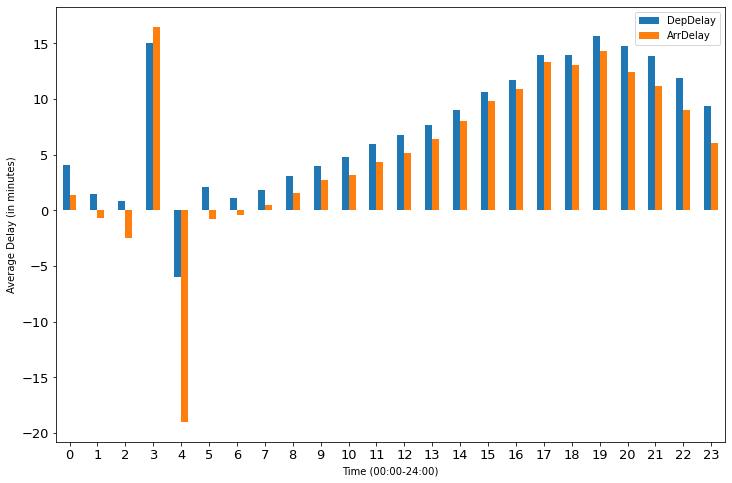

In [25]:
avg_time_delay.plot.bar(xlabel="Time (00:00-24:00)", 
                       ylabel="Average Delay (in minutes)",
                        fontsize=13,
                       figsize=(12,8));
plt.xticks(rotation=0)


In [26]:
avg_time_delay2=DelayTimes.groupby(['timeclass']).agg({'DepDelay':'mean','ArrDelay':'mean','timeclass':'count'}).rename(columns={'timeclass':'Flights'}).reset_index()
avg_time_delay2

,timeclass,DepDelay,ArrDelay,Flights
0,0,4.112450,1.369478,249
1,1,1.514925,-0.641791,134
2,2,0.826087,-2.434783,23
3,3,15.000000,16.500000,2
4,4,-6.000000,-19.000000,1
5,5,2.102217,-0.751847,1624
6,6,1.102438,-0.446528,12427
7,7,1.837215,0.458534,13312
8,8,3.097172,1.552611,14037
9,9,3.954758,2.717309,13704


We will also draw a scatterplot to visualise all 3 variables. However, we must drop the `ArrDelay` variable otherwise the *for loop* to label the plot points will not work. 

In [27]:
avg_time_delay2.drop(['ArrDelay'], axis=1, inplace=True)

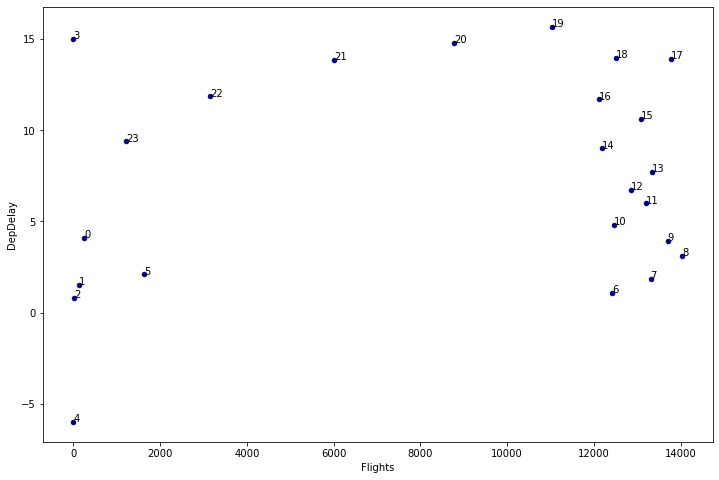

In [28]:
fig, ax = plt.subplots()
avg_time_delay2.plot.scatter(x='Flights',
                          y='DepDelay',
                          c='DarkBlue',
                            ax=ax,
                          figsize=(12,8))

for k, row in avg_time_delay2.iterrows():
    ax.annotate(row['timeclass'], (row['Flights'], row['DepDelay']))

### What is the best time of the day to fly?
The graphs above show that **5am to 7am** is the best time of the day to fly because the average delay during these hours is less than or around 5 minutes. Past 7am is when the average Arrival delay starts to noticeably and steadily increase. This is probably due to the increase of delays in other airports.

Arguably, **1am to 3am** is also a contender, but the second graph shows that not a lot of flights occur during these hours, understandably due to lack of working staff as it is during the night.

### What is the best day of the week to fly?
Similar to the above, I will create a subset of the sample.

In [29]:
col = ['Day','DepDelay','ArrDelay']
dailydelay=o2[col]

avg_daily_delay=dailydelay.groupby(['Day']).mean().sort_values(['DepDelay'])
avg_daily_delay

,DepDelay,ArrDelay
Day,,
Saturday,6.196722,3.007846
Tuesday,6.731171,5.573312
Wednesday,7.736614,6.974712
Sunday,8.849907,6.755898
Thursday,9.105842,8.407014
Monday,9.162531,8.005864
Friday,9.741041,8.819483


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Monday'),
  Text(6, 0, 'Friday')])

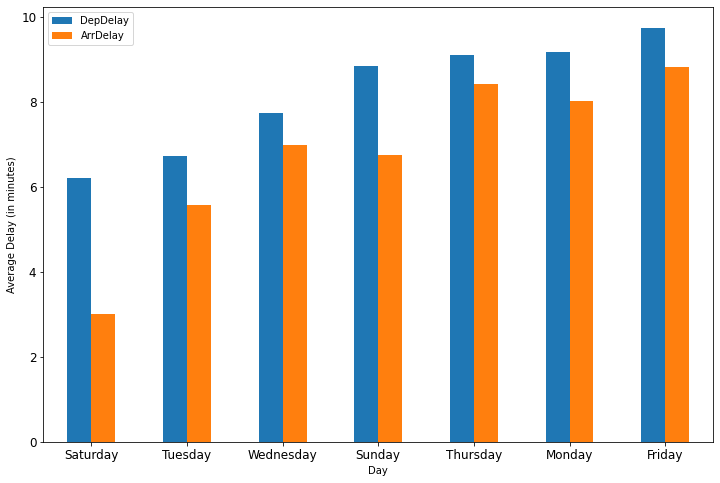

In [30]:
avg_daily_delay.plot.bar(xlabel="Day",
                       ylabel="Average Delay (in minutes)",
                        fontsize=12,
                       figsize=(12,8))

plt.xticks(rotation=0)

In [31]:
avg_daily_delay2=dailydelay.groupby(['Day']).agg({'DepDelay':'mean', 'ArrDelay':'mean','Day':'count'}).rename(columns={'Day':'Flights'}).sort_values(['DepDelay']).reset_index()
avg_daily_delay2

,Day,DepDelay,ArrDelay,Flights
0,Saturday,6.196722,3.007846,25747
1,Tuesday,6.731171,5.573312,29197
2,Wednesday,7.736614,6.974712,29303
3,Sunday,8.849907,6.755898,27976
4,Thursday,9.105842,8.407014,29714
5,Monday,9.162531,8.005864,29502
6,Friday,9.741041,8.819483,29831


Similar to what we did earlier, we must drop the `ArrDelay` column for `iterrows()` to work properly. 

In [32]:
avg_daily_delay2.drop(['ArrDelay'], axis=1, inplace=True)

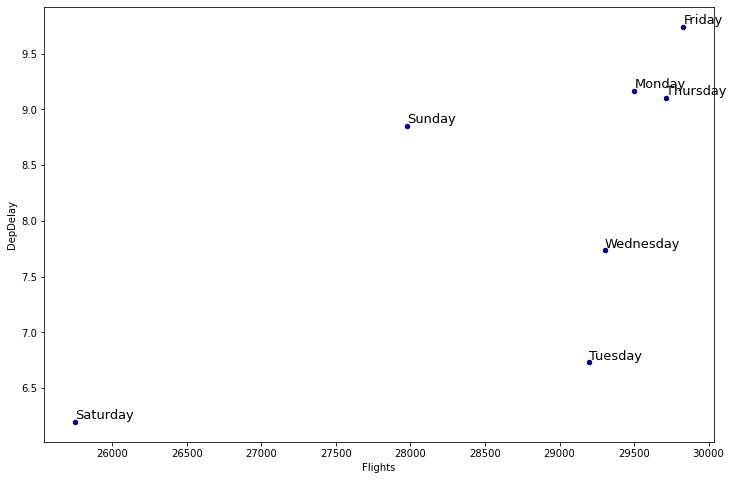

In [33]:
fig, ax = plt.subplots()
avg_daily_delay2.plot.scatter(x='Flights',
                          y='DepDelay',
                          c='DarkBlue',
                           ax=ax,
                          figsize=(12,8))

for k, row in avg_daily_delay2.iterrows():
    ax.annotate(row['Day'], (row['Flights'], row['DepDelay']), verticalalignment = "bottom", fontsize = 13)

Based on the graphs above, the best day to fly is **Saturday** or **Tuesday**. Keep in mind that the least number of flights occur on **Saturday** which explains why it has the lowest average delay. **Tuesday** has more or less the same number of flights as the other days, but has the lowest average delay despite being as busy.


### What is the best time of the year to fly?
Once again, we repeat the same process.

In [34]:
col=['NameOfMonth','DepDelay','ArrDelay']
monthlydelay=o2[col]

avg_monthly_delay=monthlydelay.groupby(['NameOfMonth']).mean().sort_values(['DepDelay'])
avg_monthly_delay

,DepDelay,ArrDelay
NameOfMonth,,
September,4.801110,2.289026
April,4.937481,2.761439
October,6.044766,4.467085
May,6.658545,5.257493
March,7.289460,5.511200
November,7.401932,5.674431
February,7.710062,6.436357
August,9.345344,8.193709
January,9.592260,8.948219


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'September'),
  Text(1, 0, 'April'),
  Text(2, 0, 'October'),
  Text(3, 0, 'May'),
  Text(4, 0, 'March'),
  Text(5, 0, 'November'),
  Text(6, 0, 'February'),
  Text(7, 0, 'August'),
  Text(8, 0, 'January'),
  Text(9, 0, 'June'),
  Text(10, 0, 'December'),
  Text(11, 0, 'July')])

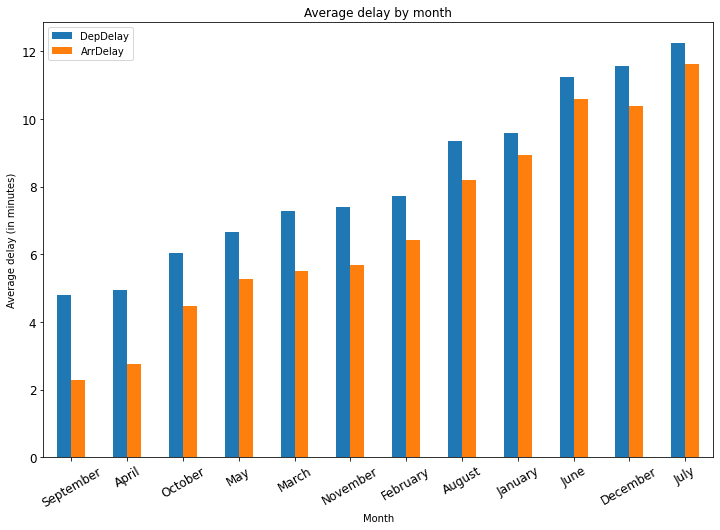

In [35]:
avg_monthly_delay.plot.bar(title='Average delay by month',
                           xlabel="Month",
                          ylabel="Average delay (in minutes)",
                           fontsize=12,
                         figsize=(12,8))

plt.xticks(rotation=30)

In [36]:
avg_monthly_delay2=monthlydelay.groupby(['NameOfMonth']).agg({'DepDelay':'mean','ArrDelay':'mean','NameOfMonth':'count'}).rename(columns={'NameOfMonth':'Flights'}).sort_values(['DepDelay']).reset_index()
avg_monthly_delay2

,NameOfMonth,DepDelay,ArrDelay,Flights
0,September,4.801110,2.289026,16220
1,April,4.937481,2.761439,16763
2,October,6.044766,4.467085,17044
3,May,6.658545,5.257493,17115
4,March,7.289460,5.511200,17277
5,November,7.401932,5.674431,16356
6,February,7.710062,6.436357,15524
7,August,9.345344,8.193709,17707
8,January,9.592260,8.948219,16280
9,June,11.229512,10.577792,16949


In [37]:
avg_monthly_delay2.drop(['ArrDelay'], axis=1, inplace=True)

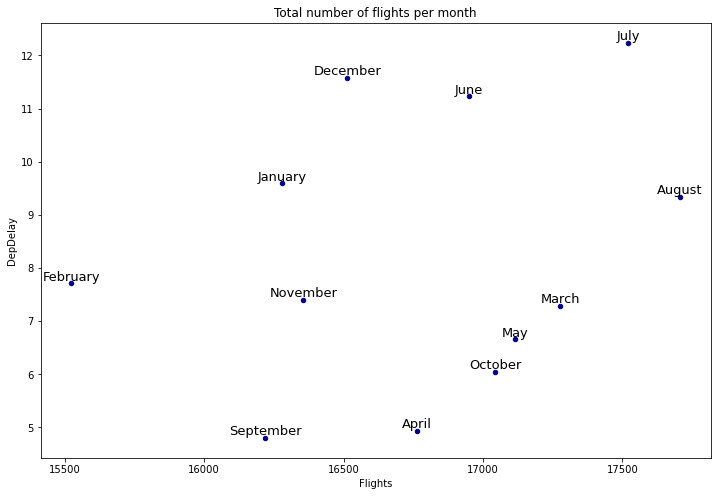

In [38]:
fig, ax = plt.subplots()
avg_monthly_delay2.plot.scatter(x='Flights',
                             y='DepDelay',
                             c='DarkBlue',
                              ax=ax,
                              title='Total number of flights per month',
                             figsize=(12,8))

for k, row in avg_monthly_delay2.iterrows():
    ax.annotate(row['NameOfMonth'], (row['Flights'], row['DepDelay']), horizontalalignment="center", verticalalignment="bottom", fontsize = 13)
    

The graphs above show that **September** or **April** is the best time of the year to fly. The second graph shows the number of flights that occur for each month and the average delay for each month. Unlike the graphs using `Day` on the x-axis, we see that there is no relationship between the number of flights and the average delay.

## Question 2
#### Do older planes suffer more delays?

This question requires the `planes` table to answer. We will use SQL Query here to construct a new dataframe with relevant variables. 

In [39]:
conn=sqlite3.connect('airline2.db')
cur=conn.cursor()
o.to_sql('sample', con=conn, if_exists='replace', index=False)
sql = '''SELECT substr(issue_date,7,4) as "YearIssued", DepDelay, ArrDelay
            FROM sample o, planes p 
            WHERE o.TailNum=p.tailnum
            AND issue_date!="None"
            AND issue_date!=""
            '''


q2=pd.read_sql(sql, conn)
conn.commit()
conn.close()
q2

,YearIssued,DepDelay,ArrDelay
0,2004,-10.0,-27.0
1,2004,-8.0,-19.0
2,2004,-3.0,-16.0
3,2004,-4.0,-15.0
4,2004,-4.0,-14.0
...,...,...,...
138744,1992,71.0,68.0
138745,1992,46.0,70.0
138746,1992,52.0,70.0
138747,1992,125.0,106.0


In [40]:
#Check datatype and NA values
q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138749 entries, 0 to 138748
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YearIssued  138749 non-null  object 
 1   DepDelay    137706 non-null  float64
 2   ArrDelay    137436 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.2+ MB


In [41]:
q2.isnull().sum()

YearIssued       0
DepDelay      1043
ArrDelay      1313
dtype: int64

There exists certain plane models that have an issue date beyond 2005. We can assume that this is not an error, but rather that the planes are being used for a different purpose. We are only interested in planes with an issue date equal to or less than 2005, however, so these will be dropped.


In [42]:
q2['YearIssued']=q2['YearIssued'].astype(int)
q2=q2[q2['YearIssued']<=2005]

In [43]:
plane_age = q2.groupby(['YearIssued']).mean().reset_index()
plane_age

,YearIssued,DepDelay,ArrDelay
0,1976,1.293333,-1.706667
1,1977,12.461538,13.948718
2,1978,4.787879,5.575758
3,1984,13.413043,10.934783
4,1985,9.889819,8.303073
5,1986,6.699015,6.860066
6,1987,8.775843,7.634279
7,1988,8.353546,7.756349
8,1989,9.596348,9.101294
9,1990,8.672163,7.537190


([<matplotlib.axis.XTick at 0x16c78e21880>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

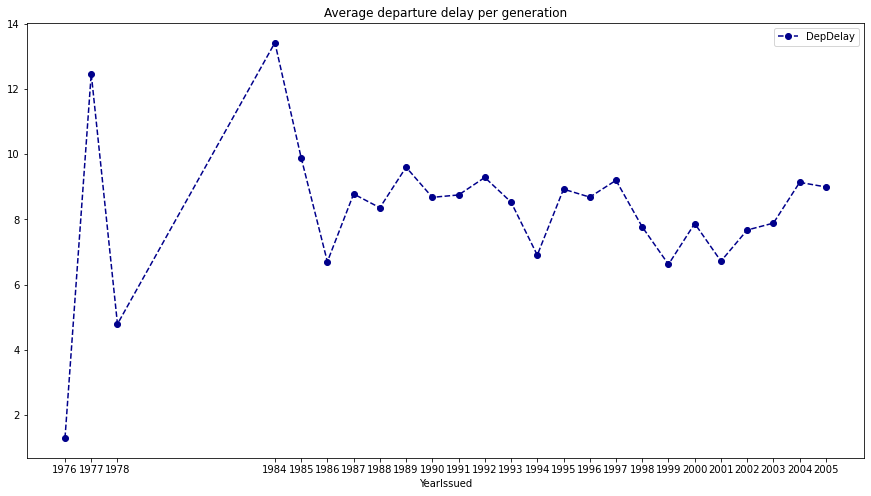

In [44]:
plane_age.plot.line(x='YearIssued',
                       y='DepDelay',
                       linestyle='dashed',
                    marker='o',
                       c="DarkBlue",
                       title='Average departure delay per generation',
                       figsize=(15,8))

plt.xticks(plane_age['YearIssued'])

In [45]:
plane_age=q2.groupby(['YearIssued']).agg({'DepDelay':'mean', 'ArrDelay':'mean','YearIssued':'count'}).rename(columns={'YearIssued':'Flights'}).reset_index()
plane_age

,YearIssued,DepDelay,ArrDelay,Flights
0,1976,1.293333,-1.706667,75
1,1977,12.461538,13.948718,39
2,1978,4.787879,5.575758,33
3,1984,13.413043,10.934783,92
4,1985,9.889819,8.303073,1435
5,1986,6.699015,6.860066,2779
6,1987,8.775843,7.634279,1853
7,1988,8.353546,7.756349,2749
8,1989,9.596348,9.101294,3209
9,1990,8.672163,7.537190,2584


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1976'),
  Text(1, 0, '1977'),
  Text(2, 0, '1978'),
  Text(3, 0, '1984'),
  Text(4, 0, '1985'),
  Text(5, 0, '1986'),
  Text(6, 0, '1987'),
  Text(7, 0, '1988'),
  Text(8, 0, '1989'),
  Text(9, 0, '1990'),
  Text(10, 0, '1991'),
  Text(11, 0, '1992'),
  Text(12, 0, '1993'),
  Text(13, 0, '1994'),
  Text(14, 0, '1995'),
  Text(15, 0, '1996'),
  Text(16, 0, '1997'),
  Text(17, 0, '1998'),
  Text(18, 0, '1999'),
  Text(19, 0, '2000'),
  Text(20, 0, '2001'),
  Text(21, 0, '2002'),
  Text(22, 0, '2003'),
  Text(23, 0, '2004'),
  Text(24, 0, '2005')])

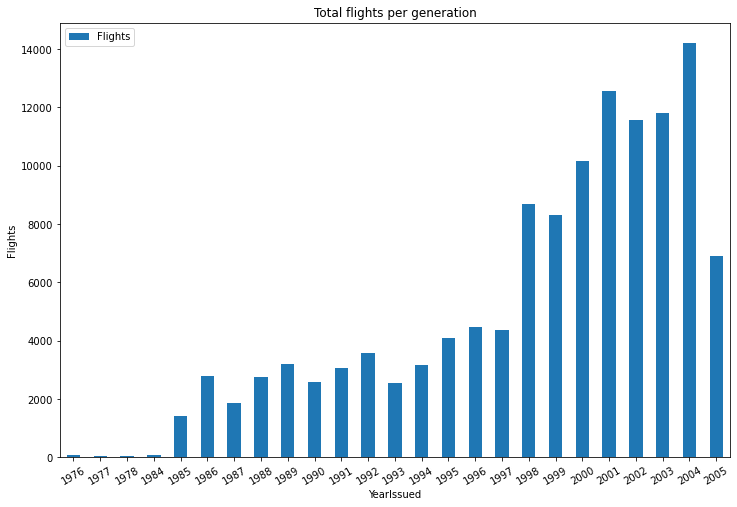

In [46]:
plane_age.plot.bar(x='YearIssued',
                  y='Flights',
                   ylabel="Flights",
                   title="Total flights per generation",
                  figsize=(12,8))

plt.xticks(rotation=30)

The first graph shows that the oldest planes (1976-1978) have less average delay than younger planes. However, if you look at the second graph, we can see that those same planes do not fly very often. In fact, planes younger than 1997 fly more frequently. The third graph combines all 3 variables, and we can see that older planes, despite flying less frequently, have higher average delay than younger planes.

Going by a ratio measurement of flights:delay, we can safely say that older planes do suffer more delays. The only exception is planes issued in 2005: they fly the least in the 1998-2005 group, yet have a higher average delay.

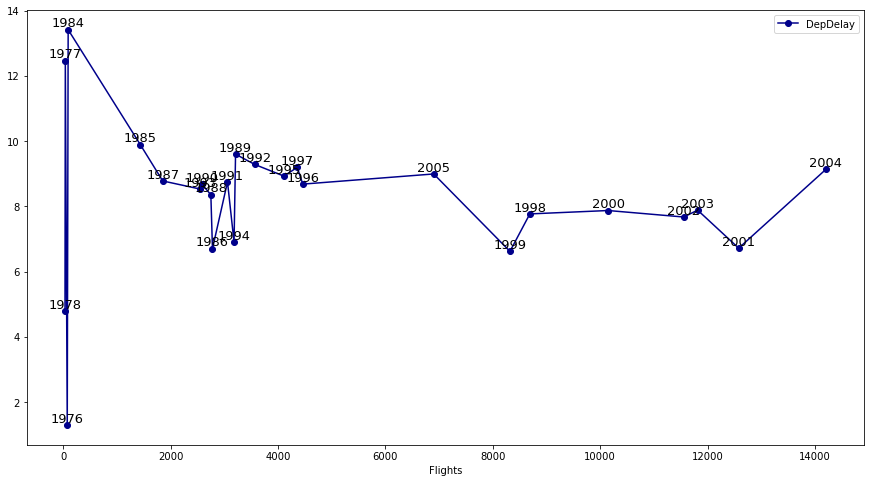

In [47]:
plane_age2 = plane_age.sort_values("Flights")
plane_age2["YearIssued"]=plane_age2["YearIssued"].astype("str")
fig, ax = plt.subplots()
plane_age2.plot.line(x='Flights',
                       y='DepDelay',
                       linestyle='solid',
                    marker='o',
                     ax=ax,
                       c="DarkBlue",
                       figsize=(15,8))

for k, row in plane_age2.iterrows():
    ax.annotate(row['YearIssued'], (row['Flights'], row['DepDelay']), horizontalalignment="center", verticalalignment="bottom", fontsize = 13)

## Question 3
#### How does the number of people flying between different locations change over time?

Before we begin, we will drop flights that were cancelled or diverted due to their association with NA values and also because we can treat these flights as if they never flew. We are only interested in flights that have filled out the variables `DepTime` and `ArrTime` because this would mean that the flights have flown and reached their destinations.

To answer this question, we must figure out the number of flights that happen for each month in their respective years. This can be done by concatenating the values from `Year` and `Month`. However, bif we remove the day from the date, Pandas will not recognise the month/year date as a *datetime* data type because it is incomplete and we will not be able to convert it into such for time-series plotting. We will substitute the 1st day of the month instead to resolve this.


In [48]:
conn=sqlite3.connect('airline2.db')
cur=conn.cursor()
sql = '''SELECT YEAR || '-' ||MONTH|| '-' || '01' as Date
            FROM sample
            WHERE Cancelled == 0
            AND Diverted == 0'''
            
q3=pd.read_sql(sql, conn)
conn.commit()
conn.close()
q3

,Date
0,2004-1-01
1,2004-1-01
2,2004-1-01
3,2004-1-01
4,2004-1-01
...,...
201265,2004-12-01
201266,2004-12-01
201267,2004-12-01
201268,2005-12-01


In [49]:
flights_over_time=q3.groupby(['Date']).agg({'Date':'count'}).rename(columns={'Date':'Flights'}).reset_index()
flights_over_time

,Date,Flights
0,2004-1-01,8028
1,2004-10-01,8655
2,2004-11-01,8185
3,2004-12-01,8527
4,2004-2-01,7825
5,2004-3-01,8643
6,2004-4-01,8290
7,2004-5-01,8329
8,2004-6-01,8298
9,2004-7-01,8593


Now we convert the `Date` variable to *datetime* datatype.

In [50]:
flights_over_time['Date']=pd.to_datetime(flights_over_time['Date'])
flights_over_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     24 non-null     datetime64[ns]
 1   Flights  24 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 512.0 bytes


([<matplotlib.axis.XTick at 0x16c5db8beb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

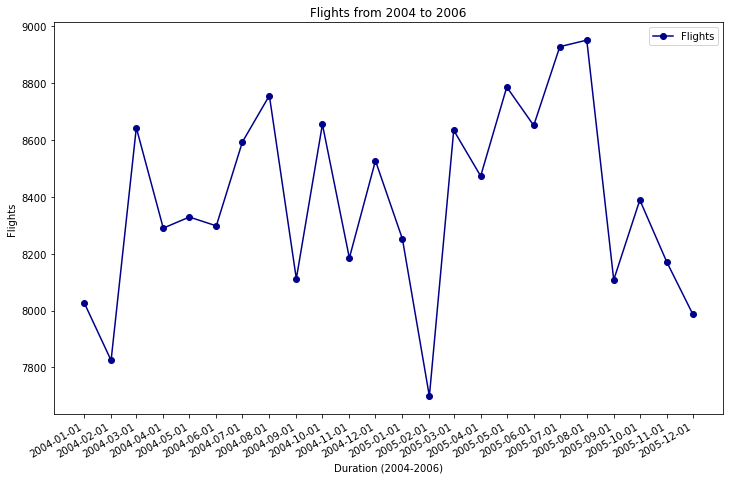

In [51]:
flights_over_time.plot.line(x='Date',
                          y='Flights',
                           marker='o',
                          c='DarkBlue',
                           xlabel='Duration (2004-2006)',
                           ylabel='Flights',
                           title='Flights from 2004 to 2006',
                          figsize=(12,8))

plt.xticks(flights_over_time['Date'])

In the graph above, people tend to fly less near the end of or beginning of the year (Nov-Feb). There are also certain months where the number of people flying dips, creating valleys in the graph. This phenomenon occurs in February, September and November, and this remains consistent in both years. Similarly, there are months where the number of people flying peaks, and this happens in March, August and October.

It also appears that in 2004, people flew more in October to December, but in 2005 less people flew in those months. People also flew less in May to June of 2004, but more people flew in May to August of 2005.

## Question 4
#### Can you detect cascading failures as delays in one airport create delays in others?

We subset and filter rows with positive `LateAircraftDelay` values because presumably this variable explains delays in the airport. 


In [52]:
#Create another copy of sample
o3 = o
o3=o3[o3['LateAircraftDelay']>0]
o3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted,LateAircraftDelay,FlightDate,Day,NameOfMonth
562590,2004,1,26,1,1927.0,1430,2120.0,1605,DH,7615,...,HPN,ORD,738,0,NaN,0,297,2004-01-26,Monday,January
40179,2005,1,31,1,1617.0,1515,1812.0,1741,US,617,...,PHL,LAS,2176,0,NaN,0,21,2005-01-31,Monday,January
67136,2004,1,5,1,1957.0,1935,2042.0,2025,WN,129,...,AUS,DAL,189,0,NaN,0,17,2004-01-05,Monday,January
68894,2005,1,3,1,1813.0,1705,49.0,2355,WN,1331,...,LAX,IND,1814,0,NaN,0,49,2005-01-03,Monday,January
325441,2005,1,31,1,2055.0,2034,2140.0,2121,EV,4105,...,CSG,ATL,83,0,NaN,0,19,2005-01-31,Monday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6608174,2005,12,18,7,2146.0,2125,2327.0,2312,US,40,...,CLT,LGA,544,0,NaN,0,14,2005-12-18,Sunday,December
6651631,2005,12,11,7,1657.0,1525,1823.0,1650,WN,2109,...,MSY,BNA,471,0,NaN,0,84,2005-12-11,Sunday,December
6529712,2004,12,12,7,2347.0,2108,223.0,2,UA,714,...,ORD,ATL,606,0,NaN,0,141,2004-12-12,Sunday,December
6777595,2004,12,26,7,1828.0,1710,2009.0,1858,XE,3495,...,EWR,CMH,462,0,NaN,0,50,2004-12-26,Sunday,December


In [53]:
conn=sqlite3.connect('airline2.db')
cur=conn.cursor()
o3.to_sql('sample3', con=conn, if_exists='replace', index=False)
sql = '''SELECT Origin, airport, SUM(LateAircraftDelay) as "SumDelay", COUNT(Origin) as "Flights"
            FROM sample3 o, airports a
            WHERE o.Origin=a.iata
            GROUP BY Origin
            HAVING COUNT(Origin) >= 30
            ORDER BY SumDelay desc'''
            
mostdelays = pd.read_sql(sql, conn)
conn.commit()
mostdelays.head(15)

,Origin,airport,SumDelay,Flights
0,ORD,Chicago O'Hare International,65720,1383
1,ATL,William B Hartsfield-Atlanta Intl,56072,1265
2,DFW,Dallas-Fort Worth International,27428,774
3,LAS,McCarran International,26400,669
4,EWR,Newark Intl,23909,496
5,PHL,Philadelphia Intl,21478,472
6,LAX,Los Angeles International,19557,508
7,IAD,Washington Dulles International,17664,347
8,DEN,Denver Intl,17615,404
9,PHX,Phoenix Sky Harbor International,16472,490


ORD and ATL are the two airports with the highest amount of late aircraft delays. Other notable airports are DFW, EWR, LAS, PHL, IAD, LAX, DEN, LGA, PHX and BOS. If we look at the airports individually, notice that  most of the top 9 airports that cause the highest delays are in the top 12 airports of the `mostdelay` table. 

From this, we can assume that yes, delays in one airport cause delays in others. 

In [54]:
conn=sqlite3.connect('airline2.db')
sql = '''SELECT Origin, Dest, SUM(LateAircraftDelay) as "SumDelay", COUNT(Origin) as "Flights"
            FROM sample3 o
            GROUP BY Origin, Dest
            HAVING SUM(LateAircraftDelay)>=1000
            ORDER BY SumDelay desc'''
mostdelays2 = pd.read_sql(sql, conn)
conn.commit()
mostdelays2.head(15)

,Origin,Dest,SumDelay,Flights
0,ORD,MSP,2705,49
1,LGA,ATL,2689,42
2,ATL,MCO,2251,34
3,LAS,PHX,2236,56
4,LGA,ORD,2203,38
5,LAS,SEA,2197,34
6,LAS,LAX,2150,49
7,ATL,EWR,2103,35
8,ORD,CLE,2068,36
9,BOS,PHL,2018,41


In [55]:
conn=sqlite3.connect('airline2.db')
sql = '''SELECT Origin, Dest, SUM(LateAircraftDelay) as "SumDelay", COUNT(Origin) as "Flights"
            FROM sample3 o
            WHERE Origin == "ORD"
            GROUP BY Origin, Dest
            HAVING SUM(LateAircraftDelay)>=1000
            ORDER BY SumDelay desc
            LIMIT 9'''
ORDdelays = pd.read_sql(sql, conn)
conn.commit()
ORDdelays

,Origin,Dest,SumDelay,Flights
0,ORD,MSP,2705,49
1,ORD,CLE,2068,36
2,ORD,EWR,1866,28
3,ORD,PHL,1832,38
4,ORD,DFW,1821,41
5,ORD,DTW,1688,32
6,ORD,CLT,1646,23
7,ORD,DEN,1630,29
8,ORD,LGA,1556,40


In [56]:
conn=sqlite3.connect('airline2.db')
sql = '''SELECT Origin, Dest, SUM(LateAircraftDelay) as "SumDelay", COUNT(Origin) as "Flights"
            FROM sample3 o
            WHERE Origin == "EWR"
            GROUP BY Origin, Dest
            HAVING COUNT(Origin) >= 10
            ORDER BY SumDelay desc
            LIMIT 9'''
EWRdelays = pd.read_sql(sql, conn)
conn.commit()
EWRdelays

,Origin,Dest,SumDelay,Flights
0,EWR,RDU,1183,28
1,EWR,LAX,1109,14
2,EWR,ATL,1074,24
3,EWR,PIT,1057,15
4,EWR,IAD,981,23
5,EWR,CLT,885,23
6,EWR,MIA,749,11
7,EWR,FLL,736,13
8,EWR,ALB,634,11


In [57]:
conn=sqlite3.connect('airline2.db')
sql = '''SELECT Origin, Dest, SUM(LateAircraftDelay) as "SumDelay", COUNT(Origin) as "Flights"
            FROM sample3 o
            WHERE Origin == "MSP"
            GROUP BY Origin, Dest
            HAVING COUNT(Origin) >= 5
            ORDER BY SumDelay desc
            LIMIT 9'''
MSPdelays = pd.read_sql(sql, conn)
conn.commit()
MSPdelays

,Origin,Dest,SumDelay,Flights
0,MSP,ORD,1152,23
1,MSP,DEN,593,13
2,MSP,IAH,445,9
3,MSP,EWR,388,6
4,MSP,ATL,352,10
5,MSP,CLE,269,5
6,MSP,PHX,174,5
7,MSP,DTW,142,8
8,MSP,MDW,142,5


In [58]:
conn=sqlite3.connect('airline2.db')
sql = '''SELECT Origin, Dest, SUM(LateAircraftDelay) as "SumDelay", COUNT(Origin) as "Flights"
            FROM sample3 o
            WHERE Origin == "RDU"
            GROUP BY Origin, Dest
            HAVING COUNT(Origin) >= 5
            ORDER BY SumDelay desc
            LIMIT 9'''
RDUdelays = pd.read_sql(sql, conn)
conn.commit()
RDUdelays

,Origin,Dest,SumDelay,Flights
0,RDU,BOS,1050,16
1,RDU,DFW,725,9
2,RDU,ATL,642,15
3,RDU,PHL,565,13
4,RDU,BNA,353,6
5,RDU,BWI,294,6
6,RDU,LGA,291,11
7,RDU,JFK,277,6
8,RDU,CMH,225,6


## Question 5 
#### Use the available variables to construct a model that predicts delays.

First, it must be said that for this question, I will not focus on the accuracy of the model, but rather on the process of making the models. 

We will utilize the `sci-kit` library for the models.

We need to create 2 separate tables; one without `DepDelay` and one without `ArrDelay`. 
This is because:
1. Both variables are strongly correlated and `ArrDelay` depends heavily on `DepDelay`. Using both would give us a high $R^{2}$ value and better predictive power in our models, but realistically this would not be possible because...<br>
2. Both variables are also unknown variables, meaning that you would not know in advance what the `DepDelay` or `ArrDelay` is. 

We will also use specific variables, namely the ones that will be known to us in advance:<br>
Month <br>
DayOfWeek <br>
CRSDepTime <br>
CRSArrTime <br>

We also want to include Origin and Dest, however these variables are categorical and due to the nature of the sample (it is quite large), it is impossible to bin these without long processing times and a large memory. We can simply use the Distance variable as a substitute, though we must keep in mind that some airport connections share the same distance.

In [59]:
#Use existing sample and clear NA values
o=o[o['Cancelled']==0]
o=o[o['Diverted']==0]
#Subset relevant variables.

#column index 12 is DepDelay.
icol=[1,2,5,7,12,15]
dep_o = o.iloc[:, icol]

#column index 11 is ArrDelay.
icol=[1,2,5,7,11,15]
arr_o = o.iloc[:, icol]
arr_o

,Month,DayofMonth,CRSDepTime,CRSArrTime,ArrDelay,Distance
551708,1,12,1340,1422,-7.0,64
118317,1,19,2050,2145,-4.0,197
520513,1,26,1710,1913,6.0,2053
4747,1,26,1245,1435,7.0,1452
24370,1,19,2007,2125,-14.0,258
...,...,...,...,...,...,...
6697303,12,19,1620,1805,67.0,958
6824860,12,12,1030,1541,-11.0,1476
7068375,12,26,1445,1939,0.0,1222
7113770,12,4,1355,1509,14.0,696


In [60]:
dep_o

,Month,DayofMonth,CRSDepTime,CRSArrTime,DepDelay,Distance
551708,1,12,1340,1422,-2.0,64
118317,1,19,2050,2145,0.0,197
520513,1,26,1710,1913,-4.0,2053
4747,1,26,1245,1435,-5.0,1452
24370,1,19,2007,2125,3.0,258
...,...,...,...,...,...,...
6697303,12,19,1620,1805,94.0,958
6824860,12,12,1030,1541,4.0,1476
7068375,12,26,1445,1939,-5.0,1222
7113770,12,4,1355,1509,12.0,696


Split the data into test and training sets with `scikit-learn` library.

In [133]:
from sklearn.model_selection import train_test_split
#Model 1 Predict DepDelay with Multi-linear regression
X = dep_o.drop('DepDelay',axis=1)
y = dep_o['DepDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [134]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(pd.Series(lr.coef_, index = X.columns))

Month         0.076216
DayofMonth    0.062695
CRSDepTime    0.007237
CRSArrTime    0.003263
Distance      0.000554
dtype: float64


In [135]:
LRdep_pred_df=pd.DataFrame(dep_pred)
LRdep_pred_df.rename(columns={0:"Predicted DepDelay"}).head()

,Predicted DepDelay
0,11.642691
1,4.538113
2,4.962679
3,3.091069
4,13.191388


In [136]:
#Evaluate model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#Predicting the accuracy score
print("R2 =", r2_score(y_test,y_pred))
print("MSE =",mean_squared_error(y_test,y_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 = 0.024821667827259586
MSE = 850.8077184817662
RMSE = 29.168608442669427


In [137]:
#Model 2 Predict ArrDelay with Multi-linear regression
X = arr_o.drop('ArrDelay',axis=1)
y = arr_o['ArrDelay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lr.fit(X_train,y_train)
arr_pred =  lr.predict(X_test)
print(pd.Series(lr.coef_, index = X.columns))

Month         0.033982
DayofMonth    0.066993
CRSDepTime    0.006404
CRSArrTime    0.004285
Distance     -0.000127
dtype: float64


In [138]:
LRarr_pred_df=pd.DataFrame(arr_pred)
LRarr_pred_df.rename(columns={0:"Predicted ArrDelay"}).head()

,Predicted ArrDelay
0,10.725375
1,3.613372
2,3.190035
3,2.120608
4,12.010866


In [139]:
print("R2 =", r2_score(y_test,arr_pred))
print("MSE =",mean_squared_error(y_test,arr_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,arr_pred)))

R2 = 0.020378567626774702
MSE = 1064.1259142818135
RMSE = 32.620942878491626


Our first two models used *Multi-linear Regression*. <br>
Both models have a high RMSE of 30 and an $R^{2}$ of roughly 0.2%. This means that the model does not perform well and is not very good at predicting the variables we want.

The next two models we create will use *Ridge Regression*. <br> 
First, we must split the data into two sets: training and testing. 

In [140]:
#Model 3 Predict DepDelay with Ridge Regression
from sklearn.linear_model import Ridge
X = dep_o.drop('DepDelay',axis=1)
y = dep_o['DepDelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
dep_pred= rr.predict(X_test)
print(pd.Series(rr.coef_, index = X.columns))

Month         0.076216
DayofMonth    0.062695
CRSDepTime    0.007237
CRSArrTime    0.003263
Distance      0.000554
dtype: float64


In [141]:
RRdep_pred_df=pd.DataFrame(dep_pred)
RRdep_pred_df.rename(columns={0:"Predicted DepDelay"}).head()

,Predicted DepDelay
0,11.642691
1,4.538113
2,4.962679
3,3.091069
4,13.191388


In [142]:
print("R2 =", r2_score(y_test,dep_pred))
print("MSE =",mean_squared_error(y_test,dep_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,dep_pred)))

R2 = 0.024821667826107285
MSE = 850.8077184827715
RMSE = 29.16860844268666


In [143]:
#Model 4 Predict ArrDelay with Ridge Regression
X = arr_o.drop('ArrDelay',axis=1)
y = arr_o['ArrDelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rr=Ridge(alpha=1)
rr.fit(X_train, y_train)
arr_pred = rr.predict(X_test)
print(pd.Series(rr.coef_, index = X.columns))

Month         0.033982
DayofMonth    0.066993
CRSDepTime    0.006404
CRSArrTime    0.004285
Distance     -0.000127
dtype: float64


In [144]:
RRarr_pred_df=pd.DataFrame(arr_pred)
RRarr_pred_df.rename(columns={0:"Predicted ArrDelay"}).head()

,Predicted ArrDelay
0,10.725375
1,3.613372
2,3.190035
3,2.120608
4,12.010866


In [132]:
print("R2 =", r2_score(y_test,arr_pred))
print("MSE =",mean_squared_error(y_test,arr_pred))
print("RMSE =",np.sqrt(mean_squared_error(y_test,arr_pred)))

R2 = 0.020378567594011465
MSE = 1064.125914317403
RMSE = 32.62094287903712


These models have similar values for RMSE and $R^{2}$ as the previous 2 models. As such, these models are also not very good at predicting accurately. 
